# Model Exercises

## <font color = "blue">Decision Tree Exercises<font color = "black"> 

**Using the *titanic* data, in your classification-exercises repository, create a notebook, ```model.ipynb``` where you will do the following:**

## Exercise 1

**What is your baseline prediction? What is your baseline accuracy?** *remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.*


## Exercise 2

**Fit the decision tree classifier to your training sample and transform.** (i.e. make predictions on the training sample)

## Exercise 3

**Evaluate your in-sample results using the model score, confusion matrix, and classification report.**

## Exercise 4

**Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.**

## Exercise 5

**Run through steps 2-4 using a different ```max_depth``` value.**

## Exercise 6

**Which model performs better on your in-sample data?**

## Exercise 7

**Which model performs best on your out-of-sample data, the ```validate``` set?**

## <font color = "blue">Random Forest Exercises<font color = "black"> 

## Exercise 1

**Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.**


## Exercise 2

**Evaluate your results using the model score, confusion matrix, and classification report.**



## Exercise 3

**Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.**



## Exercise 4

**Run through steps increasing your min_samples_leaf and decreasing your max_depth.**



## Exercise 5

**What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?**


**After making a few models, which one has the best performance (or closest metrics) on both train and validate?**

## <font color = 'blue'>K-Nearest Neighbor<font color = 'black'>

**Continue working in your ```model``` file with the *titanic* dataset.**


## Exercise 1

**Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)**



## Exercise 2

**Evaluate your results using the model score, confusion matrix, and classification report.**


## Exercise 3

**Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.**


## Exercise 4

**Run through steps 2-4 setting k to 10**



## Exercise 5

**Run through setps 2-4 setting k to 20**



## Exercise 6

**What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?**


## Exercise 7

**Which model performs best on our out-of-sample data from ```validate```?**

## <font color = 'blue'>Logistic Regression Exercises<font color = 'black'>

In these exercises, we'll continue working with the *titanic* dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, **choose a threshold that optimizes for accuracy.**

Do your work for these exercises in either a notebook or a python script named ```model``` within your classification-exercises repository. Add, commit, and push your work.


## Exercise 1

**Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?**



## Exercise 2

**Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.**



## Exercise 3

**Try out other combinations of features and models.**

## Exercise 4

**Use you best 3 models to predict and evaluate on your validate sample.**



## Exercise 5

**Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?**



## Bonus 1:

**How do different strategies for handling the missing values in the age column affect model performance?**



## Bonus 2:

**How do different strategies for encoding sex affect model performance?**


## Bonus 3: 

**```scikit-learn```'s ```LogisticRegression``` classifier is actually applying ```a regularization penalty to the coefficients``` by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the ```C``` hyper parameter. Small values of ```C``` correspond to a larger penalty, and large values of ```C``` correspond to a smaller penalty.**

**Try out the following values for ```C``` and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.**

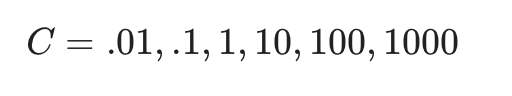

## Bonus Bonus

 **how does scaling the data interact with your choice of ```C```?**